<a href="https://colab.research.google.com/github/yosuke7040/atmacup8/blob/main/%E8%AC%9B%E5%BA%A7_1_%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E7%9C%BA%E3%82%81%E3%81%A6_submission_%E3%82%92%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pandas-profiling/pandas-profiling.git

In [ ]:
!pip show pandas_profiling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas_profiling import ProfileReport # profile report を作る用
##from pandas_profiling.utils.cache import cache_file
from matplotlib_venn import venn2 # venn図を作成する用

sns.set_style('ticks')

In [3]:
INPUT_DIR = '/content/drive/MyDrive/Colab Notebooks/atmacup08/data/inputs/'
OUTPUT_DIR = '/content/drive/MyDrive/Colab Notebooks/atmacup08/data/outputs/'

os.makedirs(OUTPUT_DIR, exist_ok=True)

train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))

whole_df = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
whole_df.T

#**train/testのReportをさっくり作る**

pandas profiling というライブラリがあり、こちらを使うとデータフレームの統計量を一気に確認することが可能です。簡単な使い方は ProfileReport class に可視化したいデータフレームを渡して repot を作り to_file を呼び出して html ファイルとして保存する方法です。

保存した html をブラウザなどで開くと以下のような統計量をカラムごとに確認できてとても便利です。

ユニークな値の数
頻度の高い値
意味の無いカラムや Null が多いカラムかどうか …etc

In [ ]:
report = ProfileReport(train_df)
report.to_file(os.path.join(OUTPUT_DIR, 'train_report.html'))

Text(0.5, 1.0, 'Year_of_Release')

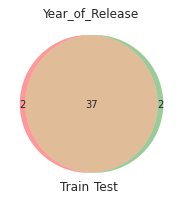

In [ ]:
c = 'Year_of_Release'

fig, ax = plt.subplots(figsize=(5,3))
# venn2は２つの円、venn3は３つ使える
venn2(
    subsets = ( set( train_df[c].unique() ), set( test_df[c].unique() ) ),
    set_labels = ('Train', 'Test'),
    ax = ax
)
ax.set_title(c)

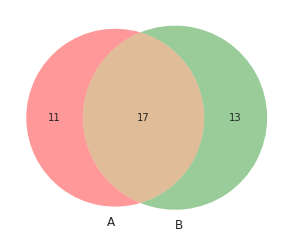

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
venn2(
    # これで集合を作図してくれるのかと思ったら、この数値をそのまま使う
    # 引数は先頭から3つしか受け付けない？
    # 集合で渡してやれば、和集合や積集合計算しそう
    subsets = ( 11,13,17 ),
)


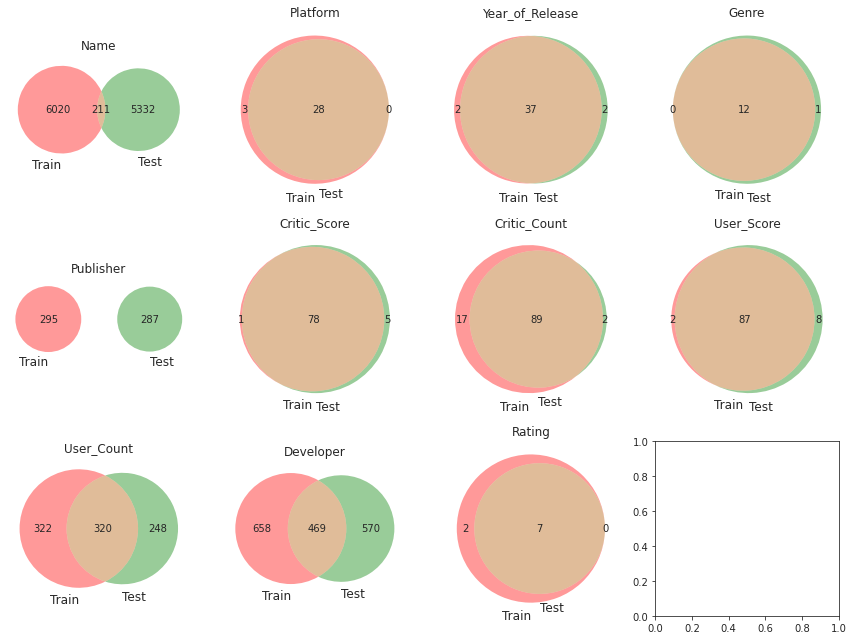

In [ ]:
columns = test_df.columns
n_figs  = len( columns )
n_cols = 4
n_rows = n_figs // n_cols + 1 # 整数除算

fig, axes = plt.subplots(
    figsize = (n_cols * 3, n_rows * 3),
    ncols = n_cols,
    nrows = n_rows)

# ravelは多次元リストを１次元のリストへ
for c, ax in zip( columns, axes.ravel() ):
    venn2(
        subsets = ( set(train_df[c].unique()), set(test_df[c].unique()) ),
        set_labels = ( 'Train', 'Test' ),
        ax = ax
    )
    ax.set_title(c)

fig.tight_layout()

In [ ]:
train_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

# 欠損値の処理

In [ ]:
# アノテーション
# 引数( : )がpd.DataFrame, 返り値(->)もDataFrameを示してる。チェックされないのでコメント的なニュアンス
def preprocess( input_df: pd.DataFrame ) -> pd.DataFrame:
    output_df = input_df.copy()
    # tbdはまだやってない
    output_df['User_score'] = input_df['User_Score'].replace('tbd', None).astype(float)
    return output_df

def create_continuous_features( input_df ):
    # ここでtrain_df['--']みたいにグローバル使うと込み入ったときに大変になるから内部だけで完結するようにする
    input_df = preprocess( input_df )
    use_columns = [
        # 連続変数
        'Critic_Score',
        'Critic_Count',
        'User_Score',
        'User_Count',
        'Year_of_Release'
    ]
    return input_df[ use_columns ].copy()

In [ ]:
# テスト
# assert 条件式, 条件式がFalseの場合に出力するメッセージ
# 今回は条件式だけ
assert len( create_continuous_features( train_df ) )  == len( train_df )

In [ ]:
assert create_continuous_features(train_df.head()).equals(create_continuous_features(train_df.head()))

## Booleanの特日量

In [ ]:
def create_boolean_feature(input_df):
    output_df = pd.DataFrame()

    text = [
        'japan',
        'nintendo'
    ]
    # lower():すべての文字を小文字 
    for t in texts:
        output_df[f'Developer_has_{t}'] = input_df['Developer'].fillna('').str.lower().str.contains(t).astype(int)
    return output_df

In [ ]:
train_df['Developer']

NameError: ignored